In [1]:
#importing the required packs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from skimage import color
from skimage import io
from imutils import paths

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(512, 512)


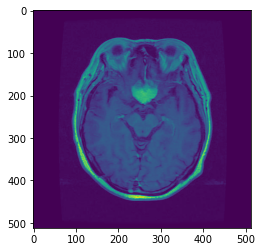

In [3]:
#1. IMAGE PRE-PROCESSING
#The actions in this section will help the main SVM model to work with the images provided and preferably also reduce the
# size/shape of the data so that the memory of the code will not exceed the limit Jupyter Notebook has. 

#Creating a path for the source dataset (which are the images) and storing it in a list.
path=(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\test\image")
images_list= []
images_paths = sorted(list(paths.list_images(path)))

#One of our first tasks will be to convert the pixels of the images into an array form. 
#To do this, we must first make sure that the images provided are in grayscale.
for path in images_paths:
    file=cv2.imread(path)
    images_grayscale = cv2.cvtColor(file,cv2.COLOR_BGR2GRAY)
    images_list.append(images_grayscale)


    
plt.imshow(images_list[0])
print(images_list[0].shape)

#This prepares the labels so they can be processed: 
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\test\label.csv")
Images = []
Labels = []

In [4]:
all_labels=list(set(file_labels['label'].tolist()))
print('All possible labels:', all_labels)
labels_map = {all_labels[x]:x for x in range (len(all_labels))}
print(labels_map)


All possible labels: ['glioma_tumor', 'no_tumor', 'pituitary_tumor', 'meningioma_tumor']
{'glioma_tumor': 0, 'no_tumor': 1, 'pituitary_tumor': 2, 'meningioma_tumor': 3}


In [5]:
#One hot encoding
from tensorflow import one_hot
one_hot_matrix = np.zeros([len(file_labels['file_name'].tolist()),len(all_labels)])
for x in range(one_hot_matrix.shape[0]):
    one_hot_matrix[x, labels_map[file_labels['label'].iloc[x]]]=1
                

In [6]:
print(one_hot_matrix)
encoded_labels=one_hot_matrix

for x in range (0,200):
    Images.append(images_list[x])

Labels.append(one_hot_matrix)


[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1.

In [7]:
Images=np.array(Images)
print(Images.shape)


(200, 512, 512)


In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model_2.add(MaxPool2D())
model_2.add(Dropout(0.1))
model_2.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model_2.add(MaxPool2D())
model_2.add(Dropout(0.1))
model_2.add(Flatten())
model_2.add(Dense(units=20, activation="relu"))
model_2.add(Dense(units=12, activation="relu"))
model_2.add(Dense(units=4, activation="softmax"))

model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_2 = model_2.fit(Images,encoded_labels,validation_split=0.2,epochs=10)

Epoch 1/10
5/5 [==============================] - 29s 6s/step - loss: 34.2485 - accuracy: 0.2500 - val_loss: 1.3852 - val_accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 54s 11s/step - loss: 2.1608 - accuracy: 0.3313 - val_loss: 1.4718 - val_accuracy: 0.4250
Epoch 3/10
5/5 [==============================] - 126s 28s/step - loss: 1.5358 - accuracy: 0.3812 - val_loss: 1.3836 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 174s 35s/step - loss: 1.3858 - accuracy: 0.3250 - val_loss: 1.3828 - val_accuracy: 0.4000
Epoch 5/10
5/5 [==============================] - 111s 22s/step - loss: 1.3856 - accuracy: 0.3250 - val_loss: 1.3822 - val_accuracy: 0.4000
Epoch 6/10
5/5 [==============================] - 98s 19s/step - loss: 1.3852 - accuracy: 0.3250 - val_loss: 1.3817 - val_accuracy: 0.4000
Epoch 7/10
5/5 [==============================] - 90s 18s/step - loss: 1.3848 - accuracy: 0.3250 - val_loss: 1.3812 - val_accuracy: 0.4000
Epoch 8/10
5/5 [========